# Model Selection

In [9]:
import math
import pickle
from copy import deepcopy

import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.dummy import DummyClassifier
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as sch
                          
%matplotlib inline

In [2]:
df = pd.read_csv('sample_data.csv')

# Feature Engineering: clustering

Take the bag of words representation of the reveiws and found the total word count with star rating categories. We need to normalize the count values by the number of instances of the star class.

In [3]:
star_word_counts = df.groupby(['star_rating']).sum().T
star_counts = dict(df.star_rating.value_counts())
for k,v in star_counts.items():
    star_word_counts[k] = star_word_counts[k]/v

In [17]:
#star_word_counts.sort_values(by=[5],ascending=False).head(10)

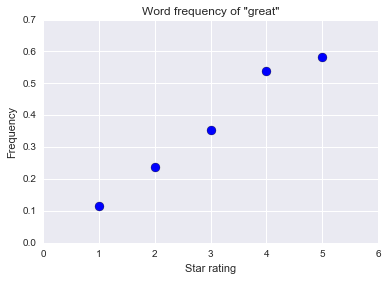

In [34]:
plt.scatter(range(1,6),star_word_counts.loc['great'],s=80)
plt.ylabel('Frequency')
plt.xlabel('Star rating')
plt.title('Word frequency of "great"')

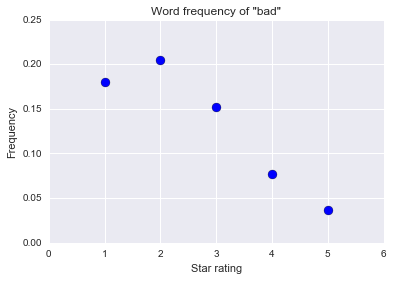

In [33]:
plt.scatter(range(1,6),star_word_counts.loc['bad'],s=80)
plt.ylabel('Frequency')
plt.xlabel('Star rating')
plt.title('Word frequency of "bad"')

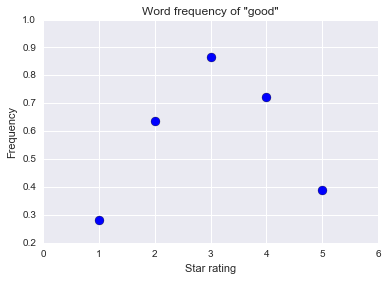

In [32]:
plt.scatter(range(1,6),star_word_counts.loc['good'],s=80)
plt.ylabel('Frequency')
plt.xlabel('Star rating')
plt.title('Word frequency of "good"')

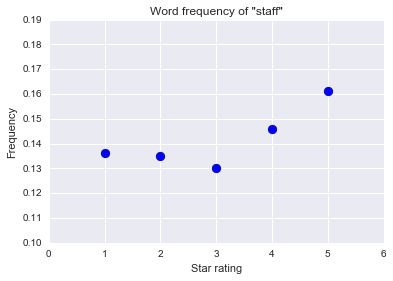

In [31]:
plt.scatter(range(1,6),star_word_counts.loc['staff'],s=80)
plt.ylabel('Frequency')
plt.xlabel('Star rating')
plt.title('Word frequency of "staff"')

We want to prune out uninteresting words. Compute the norm of all the rows, gives a measure of the size. Cut off below a certain threshhold. 

In [4]:
norm = np.sqrt(np.square(star_word_counts.sum(axis=1)))

In [5]:
X = star_word_counts[norm > .2]

In [14]:
W = star_word_counts[norm > .2]
corr_mat = W.T.corr()
D = np.array((1-corr_mat).divide(2))

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

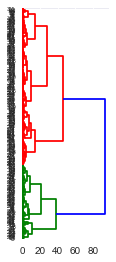

In [30]:
fig = plt.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='ward')
Z = sch.dendrogram(Y ,orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Display and save figure.
fig.show()
fig.savefig('/Users/justinstewart/Development/dendrogram.png')

([<matplotlib.axis.XTick at 0x11c49b490>,
 <a list of 4 Text xticklabel objects>)

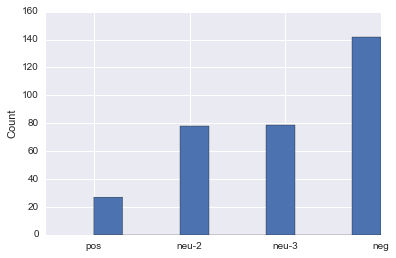

In [64]:
ind = sch.fcluster(Y, 30, 'distance')
plt.hist(ind)
plt.ylabel('Count')
plt.xticks([1,2,3,4],['pos','neu-2','neu-3','neg'])

In [53]:
means

star_rating,1,2,3,4,5
clust,,,,,
1,0.047871,0.070118,0.080129,0.116358,0.139386
2,0.052150,0.094830,0.115405,0.107304,0.070959
3,0.083967,0.122927,0.111041,0.087586,0.063029
4,0.134853,0.126141,0.090968,0.069350,0.061373


In [36]:
words_clust = pd.DataFrame(W)
words_clust['clust'] = ind
means = words_clust.groupby('clust').mean()

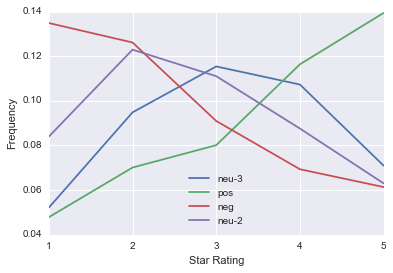

In [61]:
plt.plot(range(1,6), means.loc[2])
plt.plot(range(1,6), means.loc[1])
plt.plot(range(1,6), means.loc[4])
plt.plot(range(1,6), means.loc[3])
plt.ylabel('Frequency')
plt.xlabel('Star Rating')
plt.xticks([1,2,3,4,5])

plt.legend(['neu-3', 'pos', 'neg', 'neu-2'], loc='lower center')

plt.show()